# Домашнее задание. Урок 5. RNN
## Практическое задание

<ol>
    <li>Попробуйте обучить нейронную сеть LSTM на любом другом датасете (любимый временной ряд, текст на русском (другом языке) как генератор или классификатор, или прилагаемый набор airline-passengers - пасажиропоток для авиалиний). Опишите, какой результата вы получили? Что помогло вам улучшить ее точность?

* [Loading and Visualizing Data](#41)
* [Preprocessing Data](#42)
* [Create LSTM Model](#43)
* [Predictions and Visualising LSTM Model](#44)

<a id="41"></a>
### Импорт библиотек

In [1]:
import numpy
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
from matplotlib.pyplot import figure

In [3]:
import warnings
warnings.filterwarnings('ignore')

<a id="41"></a>
### Загрузка данных

In [18]:
data = pd.read_csv('airline-passengers.csv')
data.head(5)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df=data
df.index = df.Month

In [6]:
df.drop(columns=['Month'], inplace=True)

In [7]:
df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [8]:
df.sort_index(ascending=True, inplace=True)
df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [15]:
df.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

<AxesSubplot:xlabel='Month'>

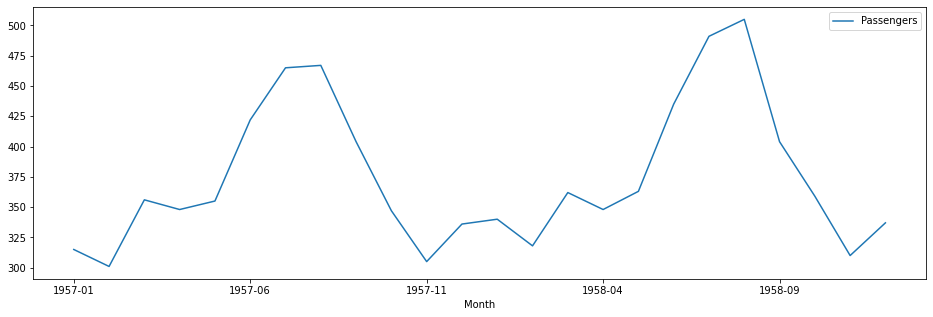

In [9]:
df.iloc[96:120].plot(figsize = (16,5) )

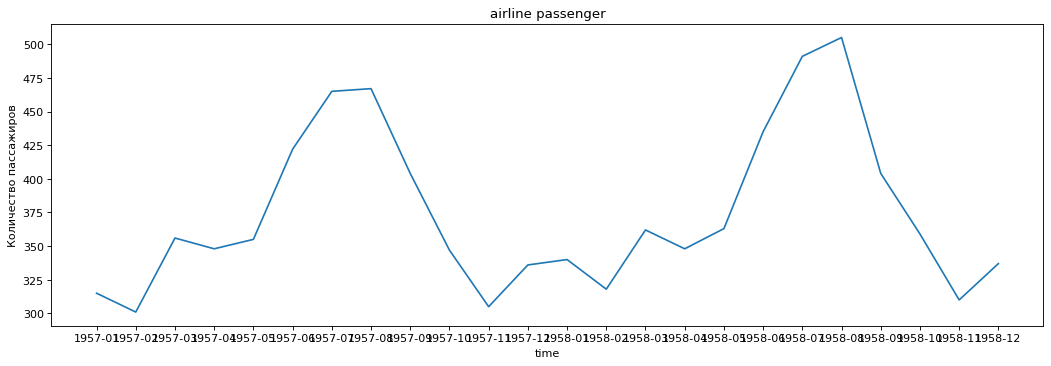

In [12]:
figure(figsize=(16, 5), dpi=80)
plt.plot(df.iloc[96:120])
plt.xlabel("time")
plt.ylabel("Количество пассажиров")
plt.title("airline passenger")
plt.show()

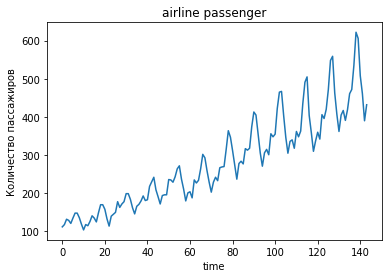

In [19]:
dataset = data.iloc[:,1].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Количество пассажиров")
plt.title("airline passenger")
plt.show()

<a id="42"></a>
### Preprocessing Data

In [20]:
#reshape
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

(144, 1)

In [21]:
# scaling 
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [22]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [23]:
def split_data(X, y, test_size):
    pos = int(round(len(X) * (1-test_size)))
    X_train, y_train = X[:pos], y[:pos]
    X_test, y_test = X[pos:], y[pos:]
    return X_train, y_train, X_test, y_test

In [34]:
look_back = 1
X, y = create_dataset(dataset, look_back)
print("X:{},y:{}".format(X.shape, y.shape))
X_train, y_train, X_test, y_test = split_data(X, y, 0.33)
print("X_train:{},y_train:{},X_test:{},y_test{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X:(142, 1),y:(142,)
X_train:(95, 1),y_train:(95,),X_test:(47, 1),y_test(47,)


In [35]:
#reshape
y = y.reshape(-1,1)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
print("X_train:{},y_train:{},X_test:{},y_test{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train:(95, 1),y_train:(95, 1),X_test:(47, 1),y_test(47, 1)


In [36]:
# reshape input to be [samples, time steps, features]

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


<a id="43"></a>
### Create LSTM Model

In [37]:
# model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
95/95 [==============================] - 1s 2ms/step - loss: 0.0578
Epoch 2/50
95/95 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 3/50
95/95 [==============================] - 0s 2ms/step - loss: 0.0223
Epoch 4/50
95/95 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 5/50
95/95 [==============================] - 0s 1ms/step - loss: 0.0176
Epoch 6/50
95/95 [==============================] - 0s 1ms/step - loss: 0.0169
Epoch 7/50
95/95 [==============================] - 0s 1ms/step - loss: 0.0157
Epoch 8/50
95/95 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 9/50
95/95 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 10/50
95/95 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 11/50
95/95 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 12/50
95/95 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 13/50
95/95 [==============================

<a id="44"></a>
### Predictions and Visualising LSTM Model

In [38]:
X_train = numpy.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = numpy.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)


(95, 1, 1)
(95, 1)
(47, 1, 1)
(47, 1)


In [42]:
X_test

array([[[0.3899614 ]],

       [[0.4073359 ]],

       [[0.3803089 ]],

       [[0.48648646]],

       [[0.47104248]],

       [[0.484556  ]],

       [[0.6138996 ]],

       [[0.6969112 ]],

       [[0.70077217]],

       [[0.57915056]],

       [[0.46911195]],

       [[0.38803086]],

       [[0.44787642]],

       [[0.45559844]],

       [[0.4131274 ]],

       [[0.4980695 ]],

       [[0.47104248]],

       [[0.49999997]],

       [[0.6389961 ]],

       [[0.7471043 ]],

       [[0.7741313 ]],

       [[0.57915056]],

       [[0.492278  ]],

       [[0.3976834 ]],

       [[0.44980696]],

       [[0.49420848]],

       [[0.45945945]],

       [[0.5830116 ]],

       [[0.5637065 ]],

       [[0.61003864]],

       [[0.71042466]],

       [[0.8571429 ]],

       [[0.8783784 ]],

       [[0.69305015]],

       [[0.5849421 ]],

       [[0.4980695 ]],

       [[0.58108103]],

       [[0.6042471 ]],

       [[0.554054  ]],

       [[0.60810804]],

       [[0.6891892 ]],

       [[0.71042

In [39]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(y_train)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(y_test)

In [40]:
trainY=trainY.reshape(1,-1)
testY = testY.reshape(1,-1)
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.95 RMSE
Test Score: 49.41 RMSE


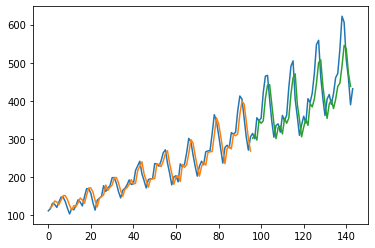

In [41]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back):len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [212]:
test1=numpy.reshape(test1,(len(test1),1,1))
y_pred=model.predict(test1)
y_pred=scaler.fit_transform(y_pred)
test=scaler.fit_transform(test)

In [216]:
test1

array([[[0.24131274]],

       [[0.1911197 ]],

       [[0.24131274]],

       [[0.26640925]],

       [[0.24903473]],

       [[0.31467178]],

       [[0.3185328 ]],

       [[0.32046333]],

       [[0.4073359 ]],

       [[0.5019305 ]],

       [[0.46911195]],

       [[0.40154442]],

       [[0.32818535]],

       [[0.25675675]],

       [[0.3359073 ]],

       [[0.34749034]],

       [[0.33397684]],

       [[0.41119692]],

       [[0.4034749 ]],

       [[0.4131274 ]],

       [[0.52123547]],

       [[0.5965251 ]],

       [[0.58108103]],

       [[0.484556  ]],

       [[0.3899614 ]],

       [[0.3223938 ]],

       [[0.3899614 ]],

       [[0.4073359 ]],

       [[0.3803089 ]],

       [[0.48648646]],

       [[0.47104248]],

       [[0.484556  ]],

       [[0.6138996 ]],

       [[0.6969112 ]],

       [[0.70077217]],

       [[0.57915056]],

       [[0.46911195]],

       [[0.38803086]],

       [[0.44787642]],

       [[0.45559844]],

       [[0.4131274 ]],

       [[0.49806

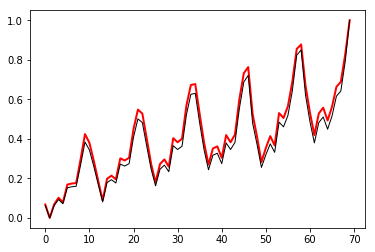

In [214]:
plt.plot(y_pred,color="red",linewidth=2)
plt.plot(test,color="black",linewidth=1)
plt.show()